## Petrological Methods
- This notebook is for EPS214 - Graduate level Volcano Science at Berkeley
- It demonstrates the Petrological method applied to melt inclusion data
- We compare melt inclusion data to satellite measurements from Kern et al. (2020)


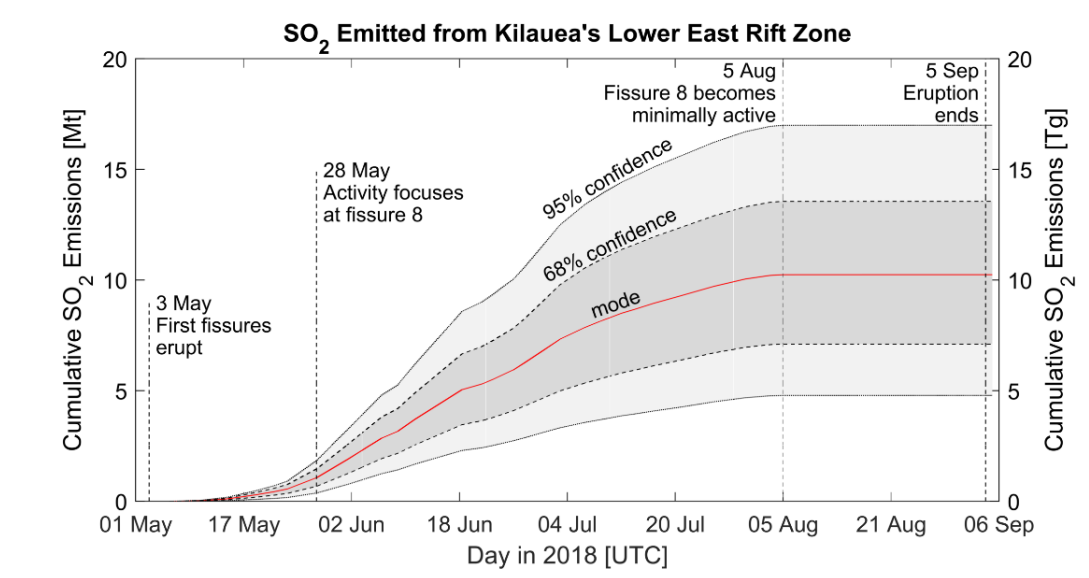

In [1]:
# Lets load the python things we will use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Lets load some melt inclusion data for Kilauea
- This data is actually from the Mauna Ulu eruption - it was all the available data in 2020-2021 as melt inclusion studies take years to complete! 

In [2]:
# Melt inclusions first
df_MI=pd.read_excel('Kilauea_Melt_Inclusion_data.xlsx', sheet_name='MI')
# Matrix glass next
df_MG=pd.read_excel('Kilauea_Melt_Inclusion_data.xlsx', sheet_name='MG')

### Lets make histograms to have a look at these

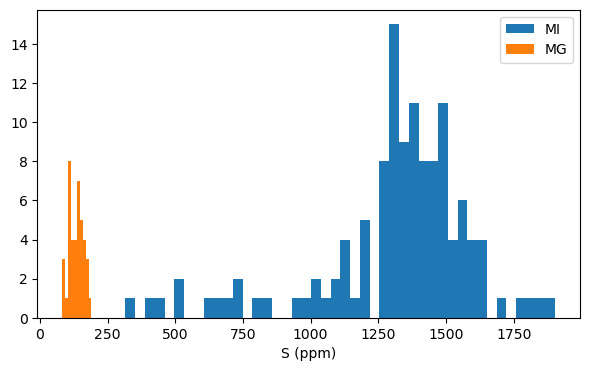

In [3]:
fig, (ax1) = plt.subplots(1, 1, figsize=(7,4))
ax1.hist(df_MI['S_ppm'], label='MI', bins=50)
ax1.hist(df_MG['S_ppm'], label='MG')
ax1.set_xlabel('S (ppm)')
#ax2.set_xlabel('Matrix Glass S')
ax1.legend()

## First, lets start with a simple calculation

In [4]:
# S in matrix glass in ppm
S_MG=np.median(df_MG['S_ppm'])
# S in average melt inclusion in ppm
S_MI=np.quantile(df_MI['S_ppm'], 0.67)
# Volume of lava erupted, Dense Rock Equivalent (DRE) in km3
V=1

## In class calcs
- 1) First calculate the mass of lava erupted. What other parameter do you need other than the volume?
- 2) what does ppm actually mean? Convert concentration difference between MI and MG to conc diff
- 3) Satellite folks express in terms of SO2, not S, convert to this using molar masses
- 4) They also express it in terms of Mt of SO2, not Kg, so convert your units at the end

In [4]:
# Type code here


## Answers below
....
Only scroll once you've had a go!

...

...

...

...

...

...

...

...

...

...

...

...

In [14]:
# Lets do a quick unit demonstration. Say you have 5 kg of magma, and 1 ppm S. How much is this in kg?
# If you had a million kg, 1 kg would be S. 
#  Take ppm, multiply by mass, divide by a million
# (5*1)/10**6 = 0.000005 kg

In [15]:
# Mass of magma in kg, Density = Mass/Volume, so Mass = Density* volume. 
rho=2700 # kg/m3, This is reasonable for given its dense rock equivalent. Actuall density more like 2000-2400
Mass_kg=rho*V*(1000)**3 # Remember to convert km3 to m3 to stay with SI units
print('Mass Lava Kg='+str(Mass_kg))

# Now take conc in ppm, times by mass, divide by 1 million
S_release_kg=((S_MI-S_MG)*Mass_kg)/10**6
S_release_kg

# Now convert to SO2 mass - will be bigger as now including O in the mass too
SO2_release_kg=S_release_kg*(32+16*2)/(32)

# Now convert to Mt SO2 not Kg
SO2_release_MT=SO2_release_kg/(1000*10**6)

print('SO2 release MT='+str(SO2_release_MT))

Mass Lava Kg=3104999999999.9995
SO2 release MT=8.056908424439998


## Now lets simulate this from a Monte Carlo Perspective - for each variable, need a range of input parameters

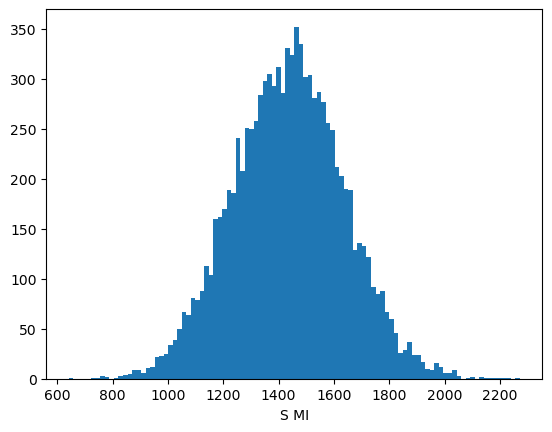

In [6]:
N_dup=10000 # number of duplicates to randomly sample from a normal distribution
# First, you want to make your distribution of errors.
# lets say the S content of the melt, we think the 1 sigma value is 100 ppm (perhaps calculated from the 
# highest S inclusoins)
S_MI_err=200
S_MI=S_MI

# Take the preferred value and add a normal distribution centered on zero, with S in MI error
S_MI_MC=np.random.normal(S_MI, S_MI_err, N_dup)
plt.hist(S_MI_MC, bins=100);
plt.xlabel('S MI')

# Do the same for matrix glasses
S_MG=np.nanmedian(df_MG['S_ppm'])
S_MG_err=np.nanstd(df_MG['S_ppm'])
S_MG_MC=np.random.normal(S_MG, S_MG_err, N_dup)

# Do the same for Volume
V=1.15
V_err=0.2
V_MC=np.random.normal(V, V_err, N_dup)

#Do the same for melt density
rho=2700
rho_err=150
rho_MC=np.random.normal(rho,rho_err, N_dup)


### Overall Calc with all variables

Text(0.5, 0, 'MT SO2')

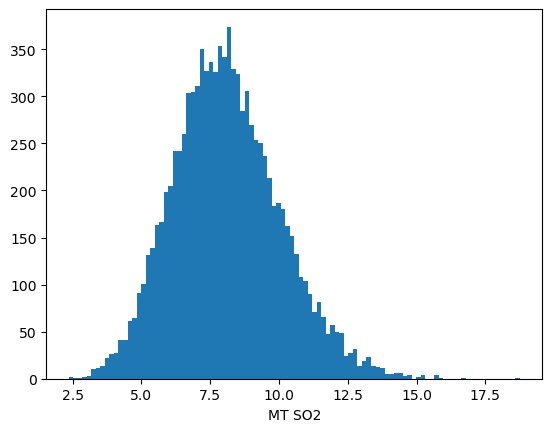

In [7]:
Mass_kg_MC=rho_MC*V_MC*(1000)**3 # Remember to convert km3 to m3 to stay with SI units

# Now take conc in ppm, times by mass, divide by 1 million
S_release_kg_MC=((S_MI_MC-S_MG_MC)*Mass_kg_MC)/10**6
S_release_kg_MC

# Now convert to SO2 mass - will be bigger as now including O in the mass too
SO2_release_kg_MC=S_release_kg_MC*(32+16*2)/(32)

# Now convert to Mt SO2 not Kg
SO2_release_MT_MC=SO2_release_kg_MC/(1000*10**6)
plt.hist(SO2_release_MT_MC, bins=100);
plt.xlabel('MT SO2')

## Now lets calculate metal release!
- We can do this in two ways, we can measure metals in the melt inclusions and matrix glasses, but this is analytically challenging, and a lot of degassing cant be distinguished from noise
- We would do similar math to that above

Text(0, 0.5, 'Se (ppm)')

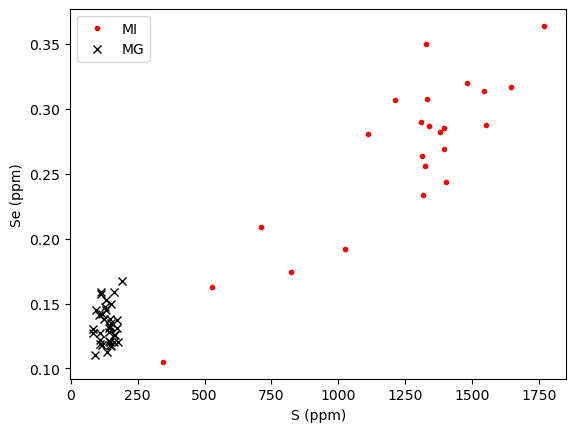

In [8]:
plt.plot(df_MI['S_ppm'], df_MI['Se_ppm'], '.r', label='MI')
plt.plot(df_MG['S_ppm'], df_MG['Se_ppm'], 'xk', label='MG')
plt.legend()
plt.xlabel('S (ppm)')
plt.ylabel('Se (ppm)')

## Alternatively, we can use X/SO2 or X/S ratios measured from filter packs etc
- You can simply take the SO2 flux (converted to S) you got above, and multiply it by these numbers
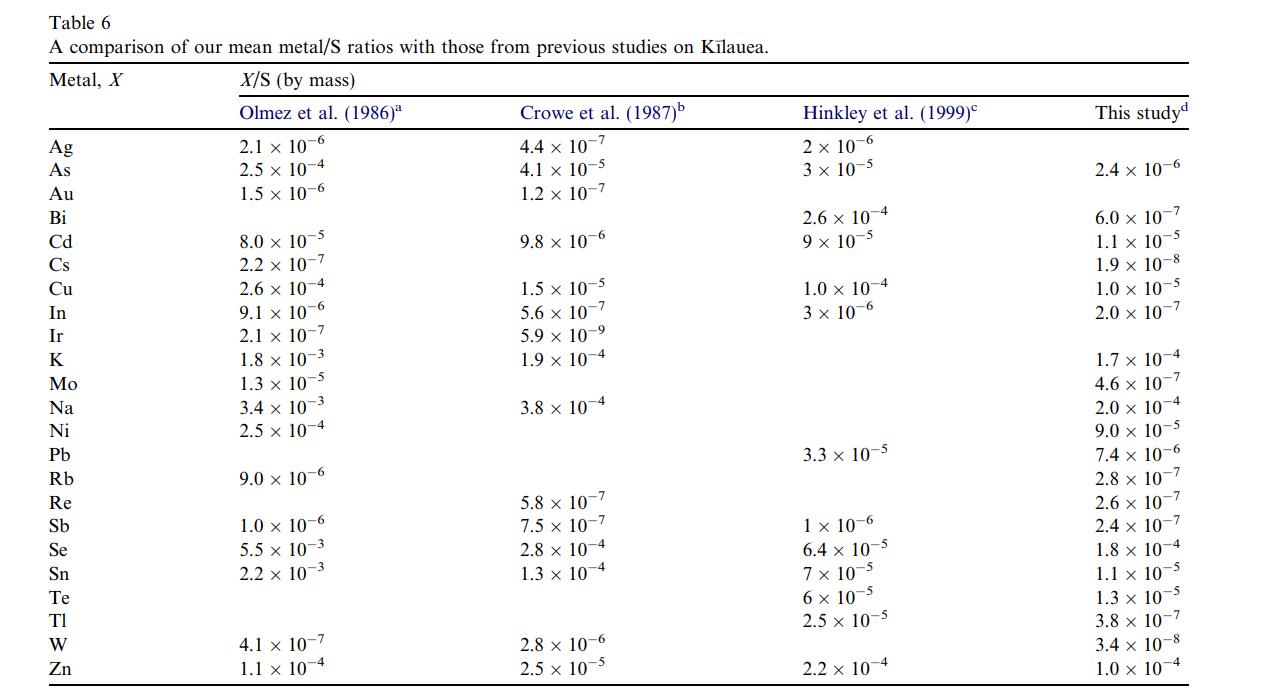

## Try calculating Selenium release for your sulfur release calculated above

In [9]:
# Type your code in here

Scroll down for one answer
.

.

.

.

.

.

.

.
.

.

.

.

.

.

.

.


In [18]:
# Simply using ratios
MT_SO2=SO2_release_MT
MT_S=MT_SO2/2
MT_Se_method1=8*1.8*10**(-4)
MT_Se_method1

0.00144

In [19]:
## Using melt inclusion data
Se_release_kg=((0.35-0.15)*Mass_kg)/10**6
Se_release_MT_method2=Se_release_kg/(1000*10**6)
Se_release_MT_method2

0.0006209999999999999